# Capstone Project - The Battle of Neighborhoods

## Introduction/Business Problem

For this work I choose 2 biggest cities of my native country: Russia. This cities are Saint Petersburg (SPb) and Moscow. For all my live I have heart about differences between this two cities. Sometimes It seems that SPb and Moscow are differ in all aspects. And people, who lived in SPb and Moscow also differs: we have various habbits, favorite places, and even named some things in different ways. 

To tell the truth I would not like to compare cities wholly. Because all cities have "Sleep districts" and generally all of them are very common. It is much more interesting to compare centers of the cities, exactly Sights (showplace) surroundings - all that tourists can see then go to museums or view memorials

Business problem? It could be anything.
1 When travel agencies make sightseeing tours, usually tourists have time to walk or have a lunch during tour - So choosing the best place for it - where each person could find something for whom taste and wallet
2 Places near Sights are usually good gift shops, restaurants and many other places, so for Businessmens who want to open shop or smtg else it could be important to know place surroundings and compare different surroundings
3 I know that many trading network from Moscow are failed to become successful in SPB and vice versa. But also There are some successful examples. And noone know about reasons of it. Comparison of centers of two cities could be useful for buisenessmens who successful in one city and want to expand theis buisness to another

## Data

Really find information about Sights and its location is easy. Just ask google or another search sistem about Sights of cities and it give you million results. To coolect all data together or find place, where will be all data we need - It is our task
Fortunatly, on Foursquare we can find all we need, so I decided just ask it for search museums of SPb and Moscow

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  54.24 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  33.90 MB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00  38.50 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  47.43 MB/s
Libraries imported.


In [2]:
# The code was removed by Watson Studio for sharing.

## Start from Saint Petersburg

In [3]:
address_spb = 'Saint-Petersburg'

geolocator = Nominatim(user_agent="foursquare_agent")
location_spb = geolocator.geocode(address_spb)
latitude_spb = location_spb.latitude
longitude_spb = location_spb.longitude
print(latitude_spb, longitude_spb)

59.938732 30.316229


In [4]:
museum_spb = 'Museum'
radius = 5000
print(museum_spb + ' .... OK!')

Museum .... OK!


In [5]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius

In [6]:
url_spb = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_spb, longitude_spb, VERSION, museum_spb, radius, LIMIT)
results_spb = requests.get(url_spb).json()

In [7]:
# assign relevant part of JSON to venues
venues_spb = results_spb['response']['venues']

# tranform venues into a dataframe
df_spb = json_normalize(venues_spb)
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df_spb.columns if col.startswith('location.')] + ['id']
df_spb_filtered = df_spb.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_spb_filtered['categories'] = df_spb_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_spb_filtered.columns = [column.split('.')[-1] for column in df_spb_filtered.columns]
df_spb_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Hermitage Museum (Государственный Эрмитаж),Art Museum,"Дворцовая наб., 34",RU,Санкт-Петербург,Россия,Дворцовая пл.,305,"[Дворцовая наб., 34 (Дворцовая пл.), 191186, С...","[{'label': 'display', 'lat': 59.941173, 'lng':...",59.941173,30.313721,NaN,191186,Санкт-Петербург,4d9abff1422ea1cd52d9ec4c
1,Russian Museum (Русский музей),Art Museum,"Инженерная ул., 4",RU,Санкт-Петербург,Россия,NaN,897,"[Инженерная ул., 4, 191011, Санкт-Петербург, Р...","[{'label': 'display', 'lat': 59.93871704466662...",59.938717,30.332319,NaN,191011,Санкт-Петербург,4bbc64cd51b89c742155872a
2,Museum of Soviet Arcade Machines (Музей советс...,Arcade,"Конюшенная пл., 2, лит. В",RU,Санкт-Петербург,Россия,NaN,619,"[Конюшенная пл., 2, лит. В, Санкт-Петербург, Р...","[{'label': 'display', 'lat': 59.94028103348995...",59.940281,30.326908,NaN,NaN,Санкт-Петербург,519690dd498e82098f5f0701
3,Russian Museum (Benois Wing) (Русский музей (К...,Art Gallery,"наб. Канала Грибоедова, 2",RU,Санкт-Петербург,Россия,Инженерная ул.,703,"[наб. Канала Грибоедова, 2 (Инженерная ул.), 1...","[{'label': 'display', 'lat': 59.93866111775865...",59.938661,30.328853,NaN,191011,Санкт-Петербург,4dbd3e31fa8cee727361cfae
4,Fabergé Museum (Музей Фаберже),Art Museum,"наб. реки Фонтанки, 21",RU,Санкт-Петербург,Россия,NaN,1563,"[наб. реки Фонтанки, 21, 191023, Санкт-Петербу...","[{'label': 'display', 'lat': 59.93480234211086...",59.934802,30.343139,NaN,191023,Санкт-Петербург,528b1a9611d20cbd10276bb2


In [8]:
df_spb_filtered.shape

(50, 16)

## So we have location of 50 museums in SPb and now lets make all the same for Moscow

In [9]:
address_msc = 'Moscow'

geolocator = Nominatim(user_agent="foursquare_agent")
location_msc = geolocator.geocode(address_msc)
latitude_msc = location_msc.latitude
longitude_msc = location_msc.longitude
print(latitude_msc, longitude_msc)

55.7504461 37.6174943


In [10]:
museum_msc = 'Museum'
print(museum_spb + ' .... OK!')

Museum .... OK!


In [11]:
url_msc = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_msc, longitude_msc, VERSION, museum_msc, radius, LIMIT)
results_msc = requests.get(url_msc).json()

In [12]:
# assign relevant part of JSON to venues
venues_msc = results_msc['response']['venues']

# tranform venues into a dataframe
df_msc = json_normalize(venues_msc)
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df_spb.columns if col.startswith('location.')] + ['id']
df_msc_filtered = df_msc.loc[:, filtered_columns]

# filter the category for each row
df_msc_filtered['categories'] = df_msc_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_msc_filtered.columns = [column.split('.')[-1] for column in df_msc_filtered.columns]
df_msc_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,The Pushkin State Museum of Fine Arts (Государ...,Art Museum,"ул. Волхонка, 12",RU,Москва,Россия,Колымажный пер.,832,"[ул. Волхонка, 12 (Колымажный пер.), 119019, М...","[{'label': 'display', 'lat': 55.74723790180542...",55.747238,37.605489,NaN,119019,Москва,4b5ac73cf964a52037d428e3
1,The State Historical Museum (Государственный и...,History Museum,"Красная пл., 1",RU,Москва,Россия,пр. Воскресенские Ворота,544,"[Красная пл., 1 (пр. Воскресенские Ворота), 10...","[{'label': 'display', 'lat': 55.75533068381269...",55.755331,37.617767,Красная площадь,109012,Москва,4ba4b8def964a52024af38e3
2,Moscow Museum of Modern Art (Московский музей ...,Art Museum,"Гоголевский бул., 10",RU,Москва,Россия,NaN,1148,"[Гоголевский бул., 10, 119019, Москва, Россия]","[{'label': 'display', 'lat': 55.74693418628614...",55.746934,37.600263,NaN,119019,Москва,4baf14b5f964a52049ea3be3
3,Moscow Museum of Modern Art (Московский музей ...,Art Museum,"ул. Петровка, 25",RU,Москва,Россия,NaN,1874,"[ул. Петровка, 25, 107031, Москва, Россия]","[{'label': 'display', 'lat': 55.76716254185605...",55.767163,37.613951,NaN,107031,Москва,4beec007e8c3c928bb0e9992
4,State Roerich Museum (Музей Рерихов),Art Museum,3/5 Malyy Znamenskiy pereulok,RU,Москва,Россия,Филиал Государственного Музея Востока,979,[3/5 Malyy Znamenskiy pereulok (Филиал Государ...,"[{'label': 'display', 'lat': 55.746738, 'lng':...",55.746738,37.603308,NaN,119019,Москва,5a5910340ff4f943743447c3


In [13]:
df_msc_filtered.shape

(50, 16)

and 50 museums of Moscow, thats it: all data we need are in two dataframes: df_spb_filtered and df_msc_filtered

## Lets create Maps

In [14]:
# create map of Saint Petersburg using latitude and longitude values
map_spb = folium.Map(location=[latitude_spb, longitude_spb], zoom_start=10)

# add markers to map
for lat, lng, name in zip(df_spb_filtered['lat'], df_spb_filtered['lng'], df_spb_filtered['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_spb)  
    
map_spb

In [15]:
# create map of Moscow using latitude and longitude values
map_msc = folium.Map(location=[latitude_msc, longitude_msc], zoom_start=10)

# add markers to map
for lat, lng, name in zip(df_msc_filtered['lat'], df_msc_filtered['lng'], df_msc_filtered['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_msc)  
    
map_msc

In [16]:
radius=500
LIMIT=200

## Now get data about museums surrounding from foursquare

In [17]:
# for it make a function
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Start from Saint Petersburg

In [18]:
spb_venues = getNearbyVenues(names=df_spb_filtered['name'],
                                   latitudes=df_spb_filtered['lat'],
                                   longitudes=df_spb_filtered['lng']
                                  )

Hermitage Museum (Государственный Эрмитаж)
Russian Museum (Русский музей)
Museum of Soviet Arcade Machines (Музей советских игровых автоматов)
Russian Museum (Benois Wing) (Русский музей (Корпус Бенуа))
Fabergé Museum (Музей Фаберже)
museúm
Art Store "Museum"
Dostoevsky Museum (Музей Достоевского)
Кафедра Музеологии ИИ СПбГУ / Department of Museum Studies
The Chocolate Museum (Музей шоколада)
Музей метрополитена / Metro museum (Музей Петербургского метрополитена)
MUSEUM of the BOHEMIAN life (Музей богемной жизни)
Museum Of Soviet Lifestyle
Russian Museum Internet Centre
The Chocolate Museum (Музей шоколада)
The General Staff (Главный штаб)
cybertale interactive museum
Музей истории Санкт-Петербургского государственного университета (СПбГУ) / Saint Petersburg State University Historical Museum
Erarta (Эрарта)
Faberge Museum Cafe
Museum Of Nonconformist Art
Музей-квартира А. С. Пушкина
Boat tour faberge museum
Sneakers Museum
Pigs Museum
Shadow Museum (Музей теней)
Hermitage Shop
The Kun

In [19]:
print(spb_venues.shape)
spb_venues.head()

(3670, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hermitage Museum (Государственный Эрмитаж),59.941173,30.313721,Hermitage Museum (Государственный Эрмитаж),59.941173,30.313721,Art Museum
1,Hermitage Museum (Государственный Эрмитаж),59.941173,30.313721,The New Hermitage (Новый Эрмитаж),59.941497,30.316805,Museum
2,Hermitage Museum (Государственный Эрмитаж),59.941173,30.313721,Атланты Эрмитажа,59.941011,30.317430,Sculpture Garden
3,Hermitage Museum (Государственный Эрмитаж),59.941173,30.313721,The Winter Palace (Зимний дворец),59.940837,30.313210,Palace
4,Hermitage Museum (Государственный Эрмитаж),59.941173,30.313721,Внутренний двор Зимнего дворца,59.940430,30.313618,Garden


In [20]:
spb_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"""EKLEKTIKA"" ART SHOP",87,87,87,87,87,87
Anna Akhmatova Museum (Музей Анны Ахматовой),90,90,90,90,90,90
Arctic and Antarctic Museum (Музей Арктики и Антарктики),100,100,100,100,100,100
"Art Store ""Museum""",30,30,30,30,30,30
Boat tour faberge museum,100,100,100,100,100,100
Central Naval Museum (Центральный военно-морской музей),78,78,78,78,78,78
Dostoevsky Museum (Музей Достоевского),100,100,100,100,100,100
Erarta (Эрарта),19,19,19,19,19,19
Faberge Museum Cafe,100,100,100,100,100,100


In [21]:
# one hot encoding
spb_onehot = pd.get_dummies(spb_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
spb_onehot['Neighborhood'] = spb_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [spb_onehot.columns[-1]] + list(spb_onehot.columns[:-1])
spb_onehot = spb_onehot[fixed_columns]

spb_onehot.head()

,Neighborhood,Accessories Store,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bakery,Bar,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Bistro,Blini House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Buffet,Building,Burger Joint,Bus Stop,Business Service,Cafeteria,Café,Camera Store,Canal,Candy Store,Cantonese Restaurant,Castle,Caucasian Restaurant,Chinese Restaurant,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Quad,College Theater,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Department Store,Design Studio,Dessert Shop,Dive Bar,Dive Shop,Doner Restaurant,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Fabric Shop,Factory,Farmers Market,Fast Food Restaurant,Film Studio,Flea Market,Flower Shop,Food & Drink Shop,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Health & Beauty Service,Health Food Store,Heliport,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lingerie Store,Liquor Store,Lounge,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nightclub,Noodle House,Notary,Opera House,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Palace,Park,Pedestrian Plaza,Pelmeni House,Performing Arts Venue,Perfume Shop,Pet Store,Pharmacy,Photography Studio,Pier,Piercing Parlor,Pizza Place,Planetarium,Playground,Plaza,Pool,Print Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Salon / Barbershop,Salsa Club,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Souvenir Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Art,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Theater,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Watch Shop,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Hermitage Museum (Государственный Эрмитаж),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hermitage Museum (Государственный Эрмитаж),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Lets see what categories are more frequent in SPB overall

In [22]:
fr_spb = spb_onehot.astype(bool).sum(axis=0).reset_index()
fr_spb.columns

Index(['index', 0], dtype='object')

In [23]:
fr_spb.sort_values([0], ascending=False, axis=0, inplace=True)

In [24]:
fr_spb.replace("Neighborhood",np.nan,inplace = True)
fr_spb.dropna(subset=["index"], axis=0,inplace=True)
fr20_spb=fr_spb.head(20)

In [25]:
fr20_spb.set_index('index',inplace=True)

In [26]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  2.1.0


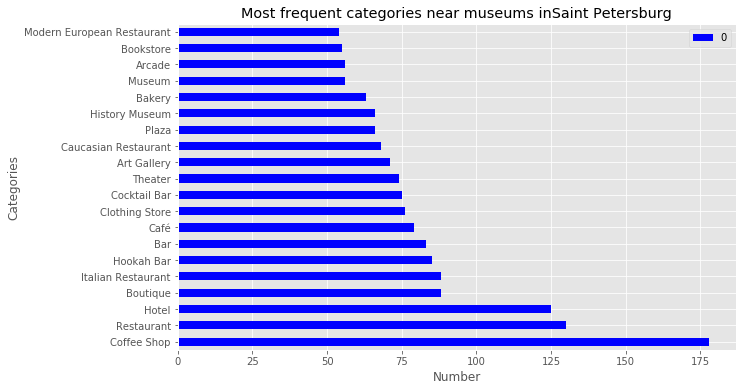

In [27]:
fr20_spb.plot(kind ='barh',
            figsize=(10, 6),color='blue'
        )
plt.title('Most frequent categories near museums inSaint Petersburg')
plt.ylabel('Categories')
plt.xlabel('Number')

plt.show()

In [28]:
spb_grouped = spb_onehot.groupby('Neighborhood').mean().reset_index()
num_top_venues = 5

for hood in spb_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = spb_grouped[spb_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----"EKLEKTIKA" ART  SHOP----
                  venue  freq
0            Hookah Bar  0.09
1                 Hotel  0.06
2           Coffee Shop  0.06
3  Caucasian Restaurant  0.05
4          Dance Studio  0.05


----Anna Akhmatova Museum (Музей Анны Ахматовой)----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.08
2                 Bar  0.06
3  Italian Restaurant  0.03
4            Beer Bar  0.03


----Arctic and Antarctic Museum (Музей Арктики и Антарктики)----
            venue  freq
0           Hotel  0.06
1  Clothing Store  0.05
2      Hookah Bar  0.05
3     Coffee Shop  0.05
4        Boutique  0.04


----Art Store "Museum"----
                         venue  freq
0                   Restaurant  0.10
1               Scenic Lookout  0.07
2         Gym / Fitness Center  0.07
3  Eastern European Restaurant  0.03
4                   Steakhouse  0.03


----Boat tour faberge museum----
                venue  freq
0        Cocktail Bar  0.10
1         Coff

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nei_spb_venues_sorted = pd.DataFrame(columns=columns)
nei_spb_venues_sorted['Neighborhood'] = spb_grouped['Neighborhood']

for ind in np.arange(spb_grouped.shape[0]):
    nei_spb_venues_sorted.iloc[ind, 1:] = return_most_common_venues(spb_grouped.iloc[ind, :], num_top_venues)

nei_spb_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"""EKLEKTIKA"" ART SHOP",Hookah Bar,Coffee Shop,Hotel,Dance Studio,Caucasian Restaurant,Bakery,Historic Site,Gastropub,Bar,Café
1,Anna Akhmatova Museum (Музей Анны Ахматовой),Coffee Shop,Cocktail Bar,Bar,Burger Joint,Hookah Bar,Pub,Italian Restaurant,Beer Bar,Movie Theater,Art Gallery
2,Arctic and Antarctic Museum (Музей Арктики и А...,Hotel,Clothing Store,Coffee Shop,Hookah Bar,Bar,Boutique,Modern European Restaurant,Cosmetics Shop,Caucasian Restaurant,Theater
3,"Art Store ""Museum""",Restaurant,Scenic Lookout,Gym / Fitness Center,Seafood Restaurant,Steakhouse,Building,Modern European Restaurant,Caucasian Restaurant,Museum,Hotel
4,Boat tour faberge museum,Cocktail Bar,Coffee Shop,Italian Restaurant,Bar,Bookstore,Movie Theater,Palace,Art Gallery,Clothing Store,Theater


### NOw we have data about SPb museums neighborhoods

## Lets Do the same for Moscow

In [31]:
msc_venues = getNearbyVenues(names=df_msc_filtered['name'],
                                   latitudes=df_msc_filtered['lat'],
                                   longitudes=df_msc_filtered['lng']
                                  )

The Pushkin State Museum of Fine Arts (Государственный музей изобразительных искусств им. А. С. Пушкина)
The State Historical Museum (Государственный исторический музей)
Moscow Museum of Modern Art (Московский музей современного искусства)
Moscow Museum of Modern Art (Московский музей современного искусства / Moscow Museum of Modern Art)
State Roerich Museum (Музей Рерихов)
Garage Museum of Contemporary Art (Музей современного искусства «Гараж»)
Moscow Design Museum (Московский Музей Дизайна)
Moscow Museum of Modern Art (Московский музей современного искусства)
Tropinin Museum (Музей Тропинина)
Музей книги / Museum of book
Музей Международного нумизматического клубаMuseum of International Numismatic Club
Fifa World Footbal Museum
Kremlin Armory (Оружейная палата)
Точка G / G-Spot Museum
Museum Gym
The museum studio
Az Museum
moscow design museum office
Museum 282
Grammy Museum Experience
Multimedia Art Museum (Мультимедиа арт-музей / Московский дом фотографии)
Museum of Moscow (Музей М

In [32]:
print(msc_venues.shape)
msc_venues.head()

(3109, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Pushkin State Museum of Fine Arts (Государ...,55.747238,37.605489,Gallery of 19th and 20th century European and ...,55.746468,37.605130,Art Gallery
1,The Pushkin State Museum of Fine Arts (Государ...,55.747238,37.605489,The Pushkin State Museum of Fine Arts (Государ...,55.747238,37.605489,Art Museum
2,The Pushkin State Museum of Fine Arts (Государ...,55.747238,37.605489,Греческий зал,55.747211,37.605313,Art Museum
3,The Pushkin State Museum of Fine Arts (Государ...,55.747238,37.605489,Pinzeria by Bontempi,55.746038,37.602141,Pizza Place
4,The Pushkin State Museum of Fine Arts (Государ...,55.747238,37.605489,Смотровая площадка Храма Христа Спасителя,55.744616,37.604442,Scenic Lookout


In [33]:
msc_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agile Museum,29,29,29,29,29,29
AgileMuseum,27,27,27,27,27,27
Art deco museum,18,18,18,18,18,18
Az Museum,70,70,70,70,70,70
Bunker-42 (Бункер-42),45,45,45,45,45,45
Fifa World Footbal Museum,87,87,87,87,87,87
Garage Museum of Contemporary Art (Музей современного искусства «Гараж»),26,26,26,26,26,26
Grammy Museum Experience,56,56,56,56,56,56
Gulag History Museum (Музей истории ГУЛАГа),36,36,36,36,36,36


In [34]:
# one hot encoding
msc_onehot = pd.get_dummies(msc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
msc_onehot['Neighborhood'] = msc_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [msc_onehot.columns[-1]] + list(msc_onehot.columns[:-1])
msc_onehot = msc_onehot[fixed_columns]

msc_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,American Restaurant,Amphitheater,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Blini House,Board Shop,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Bulgarian Restaurant,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Candy Store,Car Wash,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Country Dance Club,Coworking Space,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Design Studio,Dessert Shop,Diner,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Fabric Shop,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gift Shop,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lawyer,Library,Lingerie Store,Lounge,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nightclub,Office,Opera House,Optical Shop,Organic Grocery,Other Repair Shop,Outdoor Gym,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Pelmeni House,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Photography Studio,Pie Shop,Pier,Pizza Place,Planetarium,Playground,Plaza,Pool,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Rock Club,Roller Rink,Russian Restaurant,Salon / Barbershop,Salsa Club,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Science Museum,Seafood Restaurant,Shawarma Place,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Steakhouse,Street Art,Street Food Gathering,Strip Club,Supermarket,Sushi Restaurant,Swiss Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track Stadium,Trade School,Tree,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,University,Vape Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Watch Shop,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,The Pushkin State Museum of Fine Arts (Государ...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Pushkin State Museum of Fine Arts (Государ...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Count frequent overall for Moscow

In [35]:
fr_msc = msc_onehot.astype(bool).sum(axis=0).reset_index()
fr_msc.sort_values([0], ascending=False, axis=0, inplace=True)

In [36]:
fr_msc.replace("Neighborhood",np.nan,inplace = True)
fr_msc.dropna(subset=["index"], axis=0,inplace=True)
fr20_msc=fr_msc.head(20)
fr20_msc.set_index('index',inplace=True)

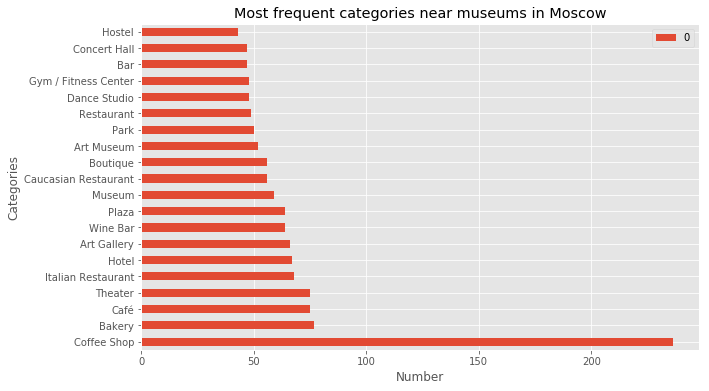

In [37]:

fr20_msc.plot(kind ='barh',
            figsize=(10, 6),
        )
plt.title('Most frequent categories near museums in Moscow')
plt.ylabel('Categories')
plt.xlabel('Number')

plt.show()

In [38]:
msc_grouped = msc_onehot.groupby('Neighborhood').mean().reset_index()
num_top_venues = 5

for hood in msc_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = msc_grouped[msc_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agile Museum----
                 venue  freq
0            Wine Shop  0.07
1  Sporting Goods Shop  0.07
2       Clothing Store  0.07
3          Coffee Shop  0.07
4             Boutique  0.07


----AgileMuseum----
                 venue  freq
0             Boutique  0.07
1          Coffee Shop  0.07
2       Clothing Store  0.07
3  Sporting Goods Shop  0.07
4           Shoe Store  0.07


----Art deco museum----
              venue  freq
0            Arcade  0.11
1            Lawyer  0.06
2  Basketball Court  0.06
3       Dry Cleaner  0.06
4      Dance Studio  0.06


----Az Museum----
          venue  freq
0   Coffee Shop  0.14
1       Theater  0.04
2        Bakery  0.04
3  Concert Hall  0.04
4      Wine Bar  0.04


----Bunker-42 (Бункер-42)----
          venue  freq
0           Pub  0.09
1     BBQ Joint  0.04
2  Dance Studio  0.04
3        Arcade  0.04
4     Gastropub  0.04


----Fifa World Footbal Museum----
          venue  freq
0   Coffee Shop  0.10
1         Hotel  0.05
2  Burger

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nei_msc_venues_sorted = pd.DataFrame(columns=columns)
nei_msc_venues_sorted['Neighborhood'] = msc_grouped['Neighborhood']

for ind in np.arange(spb_grouped.shape[0]):
    nei_msc_venues_sorted.iloc[ind, 1:] = return_most_common_venues(msc_grouped.iloc[ind, :], num_top_venues)

nei_msc_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agile Museum,Wine Shop,Boutique,Shoe Store,Clothing Store,Coffee Shop,Sporting Goods Shop,Dance Studio,Sandwich Place,Café,Other Repair Shop
1,AgileMuseum,Boutique,Shoe Store,Clothing Store,Coffee Shop,Sporting Goods Shop,Dance Studio,Sandwich Place,Café,Other Repair Shop,Food & Drink Shop
2,Art deco museum,Arcade,Coffee Shop,Lawyer,Sporting Goods Shop,Café,Tea Room,Gymnastics Gym,Track Stadium,Basketball Court,Photography Studio
3,Az Museum,Coffee Shop,Concert Hall,Bakery,Beer Bar,Theater,Wine Bar,Cocktail Bar,Clothing Store,Spa,Salon / Barbershop
4,Bunker-42 (Бункер-42),Pub,BBQ Joint,Gastropub,Theater,Arcade,Dance Studio,Bar,Bakery,Cocktail Bar,Salon / Barbershop


## Clustering

Start from Saint Petersburg

In [40]:
# set number of clusters
kclusters = 5

spb_grouped_clustering = spb_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans_spb = KMeans(n_clusters=kclusters, random_state=0).fit(spb_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_spb.labels_[0:10] 

array([4, 2, 4, 0, 2, 0, 4, 3, 2, 2], dtype=int32)

In [41]:
# add clustering labels
nei_spb_venues_sorted.insert(0, 'Cluster Labels', kmeans_spb.labels_)


In [42]:
spb_merged = df_spb_filtered

spb_merged = spb_merged.join(nei_spb_venues_sorted.set_index('Neighborhood'), on='name')

spb_merged.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hermitage Museum (Государственный Эрмитаж),Art Museum,"Дворцовая наб., 34",RU,Санкт-Петербург,Россия,Дворцовая пл.,305,"[Дворцовая наб., 34 (Дворцовая пл.), 191186, С...","[{'label': 'display', 'lat': 59.941173, 'lng':...",59.941173,30.313721,NaN,191186,Санкт-Петербург,4d9abff1422ea1cd52d9ec4c,3,Museum,Art Museum,Hotel,History Museum,Garden,Exhibit,Bookstore,Russian Restaurant,Sculpture Garden,Outdoor Sculpture
1,Russian Museum (Русский музей),Art Museum,"Инженерная ул., 4",RU,Санкт-Петербург,Россия,NaN,897,"[Инженерная ул., 4, 191011, Санкт-Петербург, Р...","[{'label': 'display', 'lat': 59.93871704466662...",59.938717,30.332319,NaN,191011,Санкт-Петербург,4bbc64cd51b89c742155872a,3,Italian Restaurant,Burger Joint,Coffee Shop,Restaurant,Theater,Nightclub,Boutique,Park,Bistro,Outdoor Sculpture
2,Museum of Soviet Arcade Machines (Музей советс...,Arcade,"Конюшенная пл., 2, лит. В",RU,Санкт-Петербург,Россия,NaN,619,"[Конюшенная пл., 2, лит. В, Санкт-Петербург, Р...","[{'label': 'display', 'lat': 59.94028103348995...",59.940281,30.326908,NaN,NaN,Санкт-Петербург,519690dd498e82098f5f0701,3,Boutique,Art Gallery,Coffee Shop,Café,Italian Restaurant,Hotel,Restaurant,Nightclub,Vegetarian / Vegan Restaurant,Cocktail Bar
3,Russian Museum (Benois Wing) (Русский музей (К...,Art Gallery,"наб. Канала Грибоедова, 2",RU,Санкт-Петербург,Россия,Инженерная ул.,703,"[наб. Канала Грибоедова, 2 (Инженерная ул.), 1...","[{'label': 'display', 'lat': 59.93866111775865...",59.938661,30.328853,NaN,191011,Санкт-Петербург,4dbd3e31fa8cee727361cfae,3,Coffee Shop,Restaurant,Italian Restaurant,Theater,Boutique,Cocktail Bar,Caucasian Restaurant,Plaza,Hotel,Nightclub
4,Fabergé Museum (Музей Фаберже),Art Museum,"наб. реки Фонтанки, 21",RU,Санкт-Петербург,Россия,NaN,1563,"[наб. реки Фонтанки, 21, 191023, Санкт-Петербу...","[{'label': 'display', 'lat': 59.93480234211086...",59.934802,30.343139,NaN,191023,Санкт-Петербург,528b1a9611d20cbd10276bb2,2,Cocktail Bar,Coffee Shop,Bookstore,Theater,Bar,Palace,Boutique,Movie Theater,Italian Restaurant,Burger Joint


In [43]:
# create map
spb_clusters = folium.Map(location=[latitude_spb, longitude_spb], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(spb_merged['lat'], spb_merged['lng'], spb_merged['name'], spb_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(spb_clusters)
       
spb_clusters

## Now watch differences between clusters

In [44]:
spb_cl0 = spb_merged.loc[spb_merged['Cluster Labels'] == 0]
spb_cl0.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,"Art Store ""Museum""",Gift Shop,"Мытнинская Набережная, 7/5",RU,NaN,Россия,NaN,1225,"[Мытнинская Набережная, 7/5, 191186, Россия]","[{'label': 'display', 'lat': 59.94786884146695...",59.947869,30.303976,NaN,191186,Санкт-Петербург,50a3436ae4b0438744a1e8b7,0,Restaurant,Scenic Lookout,Gym / Fitness Center,Seafood Restaurant,Steakhouse,Building,Modern European Restaurant,Caucasian Restaurant,Museum,Hotel
8,Кафедра Музеологии ИИ СПбГУ / Department of Mu...,College History Building,"Менделеевская линия, д. 5",RU,Санкт-Петербург,Россия,NaN,1148,"[Менделеевская линия, д. 5, Санкт-Петербург, Р...","[{'label': 'display', 'lat': 59.94369118330844...",59.943691,30.298167,NaN,NaN,Санкт-Петербург,5059aefde4b0b41547d46468,0,Café,Arcade,Science Museum,Gym / Fitness Center,Plaza,Concert Hall,Restaurant,Public Art,Coffee Shop,History Museum
17,Музей истории Санкт-Петербургского государстве...,History Museum,"Университетская наб., д. 7/9, 3-й этаж",RU,Санкт-Петербург,Россия,NaN,991,"[Университетская наб., д. 7/9, 3-й этаж, 19903...","[{'label': 'display', 'lat': 59.94161946359708...",59.941619,30.299412,NaN,199034,Санкт-Петербург,5264d7c311d2cc4c1331de00,0,Restaurant,Science Museum,Gym / Fitness Center,Art Gallery,Plaza,Public Art,Concert Hall,Café,Hotel,German Restaurant
27,The Kunstkamera (Кунсткамера),Science Museum,"Университетская наб., 3",RU,Санкт-Петербург,Россия,NaN,763,"[Университетская наб., 3, 199034, Санкт-Петерб...","[{'label': 'display', 'lat': 59.94140685593296...",59.941407,30.303630,"Василеостровский район, СПб",199034,Санкт-Петербург,4befdc8151f2c9b65ff4f092,0,Boat or Ferry,Restaurant,Plaza,Concert Hall,Public Art,Science Museum,Art Gallery,Eastern European Restaurant,College Quad,Garden
35,Central Naval Museum (Центральный военно-морск...,History Museum,"пл. Труда, 5",RU,Санкт-Петербург,Россия,наб. Крюкова канала,1584,"[пл. Труда, 5 (наб. Крюкова канала), 190000, С...","[{'label': 'display', 'lat': 59.9300312298048,...",59.930031,30.293741,NaN,190000,Санкт-Петербург,4e21a56a483b041af1eebcb0,0,Restaurant,Caucasian Restaurant,Coffee Shop,Bed & Breakfast,Bar,Russian Restaurant,Opera House,Palace,Flower Shop,History Museum


In [45]:
spb_cl0.shape # so in this cluster we have 39 museums - It is the biggest cluster

(8, 27)

In [46]:
spb_cl1 = spb_merged.loc[spb_merged['Cluster Labels'] == 1]
spb_cl1.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Museum of space exploration and rocket technol...,Science Museum,"Петропавловская крепость, 3",RU,Санкт-Петербург,Россия,NaN,1485,"[Петропавловская крепость, 3, 197046, Санкт-Пе...","[{'label': 'display', 'lat': 59.95186024060702...",59.951860,30.320976,NaN,197046,Санкт-Петербург,4e58aed9c65bcd7cbe29a353,1,Historic Site,History Museum,Plaza,Exhibit,Scenic Lookout,Boutique,Pier,Park,Factory,Coffee Shop
37,State Museum of the History of St. Petersburg ...,History Museum,"Петропавловская крепость, 3",RU,Санкт-Петербург,Россия,NaN,1224,"[Петропавловская крепость, 3, Санкт-Петербург,...","[{'label': 'display', 'lat': 59.94968109512982...",59.949681,30.318274,NaN,NaN,Санкт-Петербург,50865cda498e1d30aab9e1f4,1,Historic Site,History Museum,Scenic Lookout,Museum,Exhibit,Pier,Beach,Outdoor Sculpture,Science Museum,Boat or Ferry


In [47]:
spb_cl1.shape# so in this cluster we have only 2 museums and they are situated near each other - on Petropavlovsky iceland

(2, 27)

In [48]:
spb_cl2 = spb_merged.loc[spb_merged['Cluster Labels'] == 2]
spb_cl2.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Fabergé Museum (Музей Фаберже),Art Museum,"наб. реки Фонтанки, 21",RU,Санкт-Петербург,Россия,NaN,1563,"[наб. реки Фонтанки, 21, 191023, Санкт-Петербу...","[{'label': 'display', 'lat': 59.93480234211086...",59.934802,30.343139,NaN,191023,Санкт-Петербург,528b1a9611d20cbd10276bb2,2,Cocktail Bar,Coffee Shop,Bookstore,Theater,Bar,Palace,Boutique,Movie Theater,Italian Restaurant,Burger Joint
9,The Chocolate Museum (Музей шоколада),Candy Store,"Невский просп., 62",RU,Санкт-Петербург,Россия,NaN,1430,"[Невский просп., 62, 191011, Санкт-Петербург, ...","[{'label': 'display', 'lat': 59.93374875453992...",59.933749,30.339873,NaN,191011,Санкт-Петербург,4d99a82561a3a1cdf36de842,2,Coffee Shop,Cocktail Bar,Theater,Bookstore,Bar,Hookah Bar,Burger Joint,Wine Bar,Cosmetics Shop,Italian Restaurant
14,The Chocolate Museum (Музей шоколада),Candy Store,"ул. Жуковского, 18",RU,Санкт-Петербург,Россия,NaN,2241,"[ул. Жуковского, 18, 191014, Санкт-Петербург, ...","[{'label': 'display', 'lat': 59.9359161565427,...",59.935916,30.356033,NaN,191014,Санкт-Петербург,4d580a9d7c0b3704f468dd08,2,Coffee Shop,Cocktail Bar,Theater,Bookstore,Bar,Hookah Bar,Burger Joint,Wine Bar,Cosmetics Shop,Italian Restaurant
19,Faberge Museum Cafe,Coffee Shop,NaN,RU,Санкт-Петербург,Россия,NaN,1620,"[Санкт-Петербург, Россия]","[{'label': 'display', 'lat': 59.934868, 'lng':...",59.934868,30.344239,NaN,NaN,Санкт-Петербург,57665b89498ea0ca108a8b43,2,Cocktail Bar,Coffee Shop,Bar,Belgian Restaurant,Wine Bar,Movie Theater,Art Gallery,Clothing Store,Hotel,Italian Restaurant
22,Boat tour faberge museum,Cruise,NaN,RU,NaN,Россия,NaN,1594,[Россия],"[{'label': 'display', 'lat': 59.935182, 'lng':...",59.935182,30.343936,NaN,NaN,NaN,5794d028498e1dae18006ef4,2,Cocktail Bar,Coffee Shop,Italian Restaurant,Bar,Bookstore,Movie Theater,Palace,Art Gallery,Clothing Store,Theater


In [49]:
spb_cl2.shape # so in this cluster we have 4 museums and they are situated near each other - on Vasilevsky iceland

(6, 27)

In [50]:
spb_cl3 = spb_merged.loc[spb_merged['Cluster Labels'] == 3]
spb_cl3.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hermitage Museum (Государственный Эрмитаж),Art Museum,"Дворцовая наб., 34",RU,Санкт-Петербург,Россия,Дворцовая пл.,305,"[Дворцовая наб., 34 (Дворцовая пл.), 191186, С...","[{'label': 'display', 'lat': 59.941173, 'lng':...",59.941173,30.313721,NaN,191186,Санкт-Петербург,4d9abff1422ea1cd52d9ec4c,3,Museum,Art Museum,Hotel,History Museum,Garden,Exhibit,Bookstore,Russian Restaurant,Sculpture Garden,Outdoor Sculpture
1,Russian Museum (Русский музей),Art Museum,"Инженерная ул., 4",RU,Санкт-Петербург,Россия,NaN,897,"[Инженерная ул., 4, 191011, Санкт-Петербург, Р...","[{'label': 'display', 'lat': 59.93871704466662...",59.938717,30.332319,NaN,191011,Санкт-Петербург,4bbc64cd51b89c742155872a,3,Italian Restaurant,Burger Joint,Coffee Shop,Restaurant,Theater,Nightclub,Boutique,Park,Bistro,Outdoor Sculpture
2,Museum of Soviet Arcade Machines (Музей советс...,Arcade,"Конюшенная пл., 2, лит. В",RU,Санкт-Петербург,Россия,NaN,619,"[Конюшенная пл., 2, лит. В, Санкт-Петербург, Р...","[{'label': 'display', 'lat': 59.94028103348995...",59.940281,30.326908,NaN,NaN,Санкт-Петербург,519690dd498e82098f5f0701,3,Boutique,Art Gallery,Coffee Shop,Café,Italian Restaurant,Hotel,Restaurant,Nightclub,Vegetarian / Vegan Restaurant,Cocktail Bar
3,Russian Museum (Benois Wing) (Русский музей (К...,Art Gallery,"наб. Канала Грибоедова, 2",RU,Санкт-Петербург,Россия,Инженерная ул.,703,"[наб. Канала Грибоедова, 2 (Инженерная ул.), 1...","[{'label': 'display', 'lat': 59.93866111775865...",59.938661,30.328853,NaN,191011,Санкт-Петербург,4dbd3e31fa8cee727361cfae,3,Coffee Shop,Restaurant,Italian Restaurant,Theater,Boutique,Cocktail Bar,Caucasian Restaurant,Plaza,Hotel,Nightclub
5,museúm,Boutique,"наб. реки Мойки, 59",RU,Санкт-Петербург,Россия,NaN,364,"[наб. реки Мойки, 59, 191186, Санкт-Петербург,...","[{'label': 'display', 'lat': 59.93583136672145...",59.935831,30.319269,NaN,191186,Санкт-Петербург,5662f995498ef0856f812f83,3,Coffee Shop,Italian Restaurant,Restaurant,Boutique,Arcade,Dance Studio,Bookstore,Café,Bakery,Clothing Store


In [51]:
spb_cl3.shape # so in this cluster we have 2 museums, especcially it is museums and its shop

(22, 27)

In [52]:
spb_cl4 = spb_merged.loc[spb_merged['Cluster Labels'] == 4]
spb_cl4.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Dostoevsky Museum (Музей Достоевского),Museum,"Кузнечный пер., 5/2",RU,Санкт-Петербург,Россия,ул. Достоевского,2318,"[Кузнечный пер., 5/2 (ул. Достоевского), 19100...","[{'label': 'display', 'lat': 59.927254, 'lng':...",59.927254,30.350909,NaN,191002,Санкт-Петербург,4cb49c32eb65b1f7b7798bcd,4,Hookah Bar,Hotel,Bar,Gym / Fitness Center,Theater,Coffee Shop,Caucasian Restaurant,Restaurant,Bakery,Yoga Studio
10,Музей метрополитена / Metro museum (Музей Пете...,History Museum,"ул. Одоевского, 29",RU,Санкт-Петербург,Россия,NaN,4638,"[ул. Одоевского, 29, 199155, Санкт-Петербург, ...","[{'label': 'display', 'lat': 59.948231867386, ...",59.948232,30.235225,NaN,199155,Санкт-Петербург,4f76fcc5e4b0e0abc3e9d43b,4,Coffee Shop,Pharmacy,Mobile Phone Shop,Bakery,Pet Store,Doner Restaurant,Cosmetics Shop,Electronics Store,Playground,Gym / Fitness Center
20,Museum Of Nonconformist Art,Art Museum,Ligovsky Pr. 53,RU,NaN,Россия,NaN,2541,"[Ligovsky Pr. 53, Россия]","[{'label': 'display', 'lat': 59.9268915807498,...",59.926892,30.355187,NaN,NaN,NaN,51af4cc9498e5cdee356cdf6,4,Clothing Store,Hotel,Hookah Bar,Boutique,Shoe Store,Modern European Restaurant,Bar,Coffee Shop,Gym / Fitness Center,Hostel
23,Sneakers Museum,Thrift / Vintage Store,NaN,RU,NaN,Россия,NaN,2471,[Россия],"[{'label': 'display', 'lat': 59.9295, 'lng': 3...",59.929500,30.356533,NaN,NaN,NaN,5a101dacf96b2c24ec2c9e80,4,Clothing Store,Hotel,Cosmetics Shop,Boutique,Coffee Shop,Eastern European Restaurant,Modern European Restaurant,Hookah Bar,Shoe Store,Lingerie Store
24,Pigs Museum,None,NaN,RU,NaN,Россия,NaN,2524,[Россия],"[{'label': 'display', 'lat': 59.92804455351525...",59.928045,30.356157,NaN,NaN,NaN,50ba750ce4b09b57e7bf7309,4,Clothing Store,Hotel,Boutique,Shoe Store,Modern European Restaurant,Eastern European Restaurant,Bar,Hookah Bar,Cosmetics Shop,Bakery


In [53]:
spb_cl4.shape # so in this cluster we have 3 museums,

(12, 27)

## Now cluster Moscow museums surroundings

In [54]:
# set number of clusters
kclusters = 5

msc_grouped_clustering = msc_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans_msc = KMeans(n_clusters=kclusters, random_state=0).fit(msc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_msc.labels_[0:10]

array([1, 1, 2, 0, 0, 0, 3, 0, 0, 3], dtype=int32)

In [55]:
# add clustering labels
nei_msc_venues_sorted.insert(0, 'Cluster Labels', kmeans_msc.labels_)

In [56]:
msc_merged = df_msc_filtered

msc_merged = msc_merged.join(nei_msc_venues_sorted.set_index('Neighborhood'), on='name')

msc_merged.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,The Pushkin State Museum of Fine Arts (Государ...,Art Museum,"ул. Волхонка, 12",RU,Москва,Россия,Колымажный пер.,832,"[ул. Волхонка, 12 (Колымажный пер.), 119019, М...","[{'label': 'display', 'lat': 55.74723790180542...",55.747238,37.605489,NaN,119019,Москва,4b5ac73cf964a52037d428e3,3,Art Museum,Art Gallery,Hostel,Coffee Shop,Bakery,French Restaurant,Café,Russian Restaurant,Bar,Wine Bar
1,The State Historical Museum (Государственный и...,History Museum,"Красная пл., 1",RU,Москва,Россия,пр. Воскресенские Ворота,544,"[Красная пл., 1 (пр. Воскресенские Ворота), 10...","[{'label': 'display', 'lat': 55.75533068381269...",55.755331,37.617767,Красная площадь,109012,Москва,4ba4b8def964a52024af38e3,4,Boutique,Coffee Shop,Cosmetics Shop,Italian Restaurant,Lingerie Store,Plaza,Fountain,Hotel,Shoe Store,Restaurant
2,Moscow Museum of Modern Art (Московский музей ...,Art Museum,"Гоголевский бул., 10",RU,Москва,Россия,NaN,1148,"[Гоголевский бул., 10, 119019, Москва, Россия]","[{'label': 'display', 'lat': 55.74693418628614...",55.746934,37.600263,NaN,119019,Москва,4baf14b5f964a52049ea3be3,3,Wine Bar,Coffee Shop,Theater,Art Museum,Art Gallery,Bakery,Café,Park,Caucasian Restaurant,Restaurant
3,Moscow Museum of Modern Art (Московский музей ...,Art Museum,"ул. Петровка, 25",RU,Москва,Россия,NaN,1874,"[ул. Петровка, 25, 107031, Москва, Россия]","[{'label': 'display', 'lat': 55.76716254185605...",55.767163,37.613951,NaN,107031,Москва,4beec007e8c3c928bb0e9992,0,Theater,Cocktail Bar,Yoga Studio,Restaurant,Boutique,Italian Restaurant,Russian Restaurant,Seafood Restaurant,Clothing Store,Coffee Shop
4,State Roerich Museum (Музей Рерихов),Art Museum,3/5 Malyy Znamenskiy pereulok,RU,Москва,Россия,Филиал Государственного Музея Востока,979,[3/5 Malyy Znamenskiy pereulok (Филиал Государ...,"[{'label': 'display', 'lat': 55.746738, 'lng':...",55.746738,37.603308,NaN,119019,Москва,5a5910340ff4f943743447c3,3,Art Museum,Art Gallery,Café,Hostel,Coffee Shop,Russian Restaurant,French Restaurant,Bakery,Park,Wine Bar


In [57]:
# create map
msc_clusters = folium.Map(location=[latitude_msc, longitude_msc], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(msc_merged['lat'], msc_merged['lng'], msc_merged['name'], msc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(msc_clusters)
       
msc_clusters

## Now watch differences between clusters

In [58]:
msc_cl0 = msc_merged.loc[msc_merged['Cluster Labels'] == 0]
msc_cl0.shape # on this cluster there are 2 museums, I can say that it`s museums near big parks and rest zones

(28, 27)

In [59]:
msc_cl0.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Moscow Museum of Modern Art (Московский музей ...,Art Museum,"ул. Петровка, 25",RU,Москва,Россия,NaN,1874,"[ул. Петровка, 25, 107031, Москва, Россия]","[{'label': 'display', 'lat': 55.76716254185605...",55.767163,37.613951,NaN,107031,Москва,4beec007e8c3c928bb0e9992,0,Theater,Cocktail Bar,Yoga Studio,Restaurant,Boutique,Italian Restaurant,Russian Restaurant,Seafood Restaurant,Clothing Store,Coffee Shop
8,Tropinin Museum (Музей Тропинина),Art Museum,"Щетининский пер., 10, стр. 1",RU,Москва,Россия,NaN,1898,"[Щетининский пер., 10, стр. 1, 119017, Москва,...","[{'label': 'display', 'lat': 55.73365692701316...",55.733657,37.622841,NaN,119017,Москва,4e08a28b6284d9ee92dc6f34,0,Coffee Shop,Bakery,Caucasian Restaurant,Italian Restaurant,Spa,Health & Beauty Service,Boutique,Gym / Fitness Center,Massage Studio,Theater
10,Музей Международного нумизматического клубаMus...,Art Museum,Большой Афанасьевский переулок 24,RU,Москва,Россия,NaN,1112,"[Большой Афанасьевский переулок 24, 119019, Мо...","[{'label': 'display', 'lat': 55.75127698942349...",55.751277,37.599796,NaN,119019,Москва,5a7c23848fb09e21bb3ea341,0,Coffee Shop,Bakery,Bar,Hostel,Wine Bar,Art Gallery,BBQ Joint,Art Museum,Plaza,Caucasian Restaurant
11,Fifa World Footbal Museum,Museum,21 улица Новый Арбат,RU,Москва,Россия,NaN,2063,"[21 улица Новый Арбат, 119019, Москва, Россия]","[{'label': 'display', 'lat': 55.75221487118382...",55.752215,37.584702,NaN,119019,Москва,5b2fda9f86bc49002c517431,0,Coffee Shop,Hotel,Museum,Burger Joint,Salon / Barbershop,Bar,Bakery,Gym / Fitness Center,Middle Eastern Restaurant,Hostel
13,Точка G / G-Spot Museum,Erotic Museum,"ул. Новый Арбат, 15",RU,Москва,Россия,NaN,1598,"[ул. Новый Арбат, 15, Москва, Россия]","[{'label': 'display', 'lat': 55.75215358622034...",55.752154,37.592166,NaN,NaN,Москва,4dfa2c9fe4cd56a649852805,0,Coffee Shop,Bakery,Concert Hall,Museum,Theater,Burger Joint,Hostel,Yoga Studio,Bar,Italian Restaurant


In [60]:
msc_cl1 = msc_merged.loc[msc_merged['Cluster Labels'] == 1]
msc_cl1.shape # on this cluster there are 15 museums, They are far from each other and situated in all districts of historical part of the city

(2, 27)

In [61]:
msc_cl1.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Agile Museum,Campaign Office,NaN,RU,NaN,Россия,NaN,5131,[Россия],"[{'label': 'display', 'lat': 55.7044938667118,...",55.704494,37.623921,NaN,NaN,NaN,53ccd14b498e5dff61988fb3,1,Wine Shop,Boutique,Shoe Store,Clothing Store,Coffee Shop,Sporting Goods Shop,Dance Studio,Sandwich Place,Café,Other Repair Shop
47,AgileMuseum,Tech Startup,NaN,RU,NaN,Россия,NaN,5122,[Россия],"[{'label': 'display', 'lat': 55.704589, 'lng':...",55.704589,37.624245,NaN,NaN,NaN,53fc7804498e8e5181e6d3ca,1,Boutique,Shoe Store,Clothing Store,Coffee Shop,Sporting Goods Shop,Dance Studio,Sandwich Place,Café,Other Repair Shop,Food & Drink Shop


In [62]:
msc_cl2 = msc_merged.loc[msc_merged['Cluster Labels'] == 2]
msc_cl2.shape # on this cluster there are 6  museums, All of them are not very far from Cremlin

(2, 27)

In [63]:
msc_cl2.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,The museum studio,Photography Lab,Лужнецкая набережная 2/4 стр.50,RU,Москва,Россия,NaN,4826,"[Лужнецкая набережная 2/4 стр.50, Москва, Россия]","[{'label': 'display', 'lat': 55.71535007851011...",55.715350,37.572275,NaN,NaN,Москва,56c82bfbcd10968b50f9130b,2,Playground,Arcade,Restaurant,Scenic Lookout,Tennis Court,Gastropub,Theme Park,Seafood Restaurant,Science Museum,Sporting Goods Shop
25,Art deco museum,Art Museum,Лужнецкая Набережная Д. 2/4,RU,Москва,Россия,NaN,4871,"[Лужнецкая Набережная Д. 2/4, Москва, Россия]","[{'label': 'display', 'lat': 55.71723175048828...",55.717232,37.566891,NaN,NaN,Москва,55cf07d5498e1d08741e24fb,2,Arcade,Coffee Shop,Lawyer,Sporting Goods Shop,Café,Tea Room,Gymnastics Gym,Track Stadium,Basketball Court,Photography Studio


In [64]:
msc_cl3 = msc_merged.loc[msc_merged['Cluster Labels'] == 3]
msc_cl3.shape # on this cluster there are 7  museums, which are in 2 districts of Moscow

(12, 27)

In [65]:
msc_cl3.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,The Pushkin State Museum of Fine Arts (Государ...,Art Museum,"ул. Волхонка, 12",RU,Москва,Россия,Колымажный пер.,832,"[ул. Волхонка, 12 (Колымажный пер.), 119019, М...","[{'label': 'display', 'lat': 55.74723790180542...",55.747238,37.605489,NaN,119019,Москва,4b5ac73cf964a52037d428e3,3,Art Museum,Art Gallery,Hostel,Coffee Shop,Bakery,French Restaurant,Café,Russian Restaurant,Bar,Wine Bar
2,Moscow Museum of Modern Art (Московский музей ...,Art Museum,"Гоголевский бул., 10",RU,Москва,Россия,NaN,1148,"[Гоголевский бул., 10, 119019, Москва, Россия]","[{'label': 'display', 'lat': 55.74693418628614...",55.746934,37.600263,NaN,119019,Москва,4baf14b5f964a52049ea3be3,3,Wine Bar,Coffee Shop,Theater,Art Museum,Art Gallery,Bakery,Café,Park,Caucasian Restaurant,Restaurant
4,State Roerich Museum (Музей Рерихов),Art Museum,3/5 Malyy Znamenskiy pereulok,RU,Москва,Россия,Филиал Государственного Музея Востока,979,[3/5 Malyy Znamenskiy pereulok (Филиал Государ...,"[{'label': 'display', 'lat': 55.746738, 'lng':...",55.746738,37.603308,NaN,119019,Москва,5a5910340ff4f943743447c3,3,Art Museum,Art Gallery,Café,Hostel,Coffee Shop,Russian Restaurant,French Restaurant,Bakery,Park,Wine Bar
5,Garage Museum of Contemporary Art (Музей совре...,Art Museum,ЦПКиО им. Горького,RU,Москва,Россия,"ул. Крымский Вал, 9, стр. 32",2716,"[ЦПКиО им. Горького (ул. Крымский Вал, 9, стр....","[{'label': 'display', 'lat': 55.72774207017604...",55.727742,37.601606,NaN,119049,Москва,4d624fdb29105941fffc0847,3,Dance Studio,Indie Movie Theater,Café,Art Museum,Tea Room,Playground,Scenic Lookout,Fountain,Outdoor Gym,Park
7,Moscow Museum of Modern Art (Московский музей ...,Art Museum,"Ермолаевский пер., 17",RU,Москва,Россия,NaN,2298,"[Ермолаевский пер., 17, 123001, Москва, Россия]","[{'label': 'display', 'lat': 55.76544288802809...",55.765443,37.592266,NaN,123001,Москва,4ce2586fffcf37041afb2a82,3,Wine Bar,Coffee Shop,Theater,Art Museum,Art Gallery,Bakery,Café,Park,Caucasian Restaurant,Restaurant


In [66]:
msc_cl4 = msc_merged.loc[msc_merged['Cluster Labels'] == 4]
msc_cl4.shape # on this cluster there are 20  museums - it is the biggest cluster, mostky in this cluster are small and very specific museums

(6, 27)

In [67]:
msc_cl4.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,The State Historical Museum (Государственный и...,History Museum,"Красная пл., 1",RU,Москва,Россия,пр. Воскресенские Ворота,544,"[Красная пл., 1 (пр. Воскресенские Ворота), 10...","[{'label': 'display', 'lat': 55.75533068381269...",55.755331,37.617767,Красная площадь,109012,Москва,4ba4b8def964a52024af38e3,4,Boutique,Coffee Shop,Cosmetics Shop,Italian Restaurant,Lingerie Store,Plaza,Fountain,Hotel,Shoe Store,Restaurant
6,Moscow Design Museum (Московский Музей Дизайна),Art Museum,NaN,RU,NaN,Россия,NaN,512,[Россия],"[{'label': 'display', 'lat': 55.75423122007715...",55.754231,37.612830,NaN,NaN,NaN,50dc3194e4b0cde37e544289,4,Plaza,Coffee Shop,Boutique,History Museum,Shoe Store,Restaurant,Hotel,Cosmetics Shop,Concert Hall,Fountain
22,Moscow-City (ММДЦ «Москва-Сити»),Business Center,Пресненская наб.,RU,Москва,Россия,NaN,4845,"[Пресненская наб., 123100, Москва, Россия]","[{'label': 'display', 'lat': 55.74875188700002...",55.748752,37.540218,Пресненский,123100,Москва,4ca2e5f8c1f1ef3b9c4e8ca4,4,Coffee Shop,Gym / Fitness Center,Cosmetics Shop,Seafood Restaurant,Wine Shop,Jewelry Store,Asian Restaurant,Scenic Lookout,Ice Cream Shop,Multiplex
23,Old English Court (Старый английский двор),History Museum,"ул. Варварка, 4а",RU,Москва,Россия,NaN,629,"[ул. Варварка, 4а, 109012, Москва, Россия]","[{'label': 'display', 'lat': 55.75240789862514...",55.752408,37.626911,NaN,109012,Москва,4cfa2e1c7f2db1f78dd925d4,4,Boutique,Plaza,Coffee Shop,Cosmetics Shop,Seafood Restaurant,Art Gallery,History Museum,Restaurant,Historic Site,Café
26,Museum of soviet arcade machines (Музей советс...,History Museum,"ул. Кузнецкий Мост, 12",RU,Москва,Россия,Неглинная ул.,1283,"[ул. Кузнецкий Мост, 12 (Неглинная ул.), 10703...","[{'label': 'display', 'lat': 55.76180010436325...",55.761800,37.621053,NaN,107031,Москва,5571e000498e7e23d0118b06,4,Boutique,Café,Coffee Shop,Eastern European Restaurant,Hotel,Cocktail Bar,Shoe Store,Burger Joint,Opera House,Irish Pub


## Now I would like to repeat it for SPb and Moscow together - it is allow to find most similar places in two cities

In [68]:
df_data=df_spb_filtered.append(df_msc_filtered)
df_data.shape

(100, 16)

In [69]:
data_venues = getNearbyVenues(names=df_data['name'],
                                   latitudes=df_data['lat'],
                                   longitudes=df_data['lng']
                                  )

Hermitage Museum (Государственный Эрмитаж)
Russian Museum (Русский музей)
Museum of Soviet Arcade Machines (Музей советских игровых автоматов)
Russian Museum (Benois Wing) (Русский музей (Корпус Бенуа))
Fabergé Museum (Музей Фаберже)
museúm
Art Store "Museum"
Dostoevsky Museum (Музей Достоевского)
Кафедра Музеологии ИИ СПбГУ / Department of Museum Studies
The Chocolate Museum (Музей шоколада)
Музей метрополитена / Metro museum (Музей Петербургского метрополитена)
MUSEUM of the BOHEMIAN life (Музей богемной жизни)
Museum Of Soviet Lifestyle
Russian Museum Internet Centre
The Chocolate Museum (Музей шоколада)
The General Staff (Главный штаб)
cybertale interactive museum
Музей истории Санкт-Петербургского государственного университета (СПбГУ) / Saint Petersburg State University Historical Museum
Erarta (Эрарта)
Faberge Museum Cafe
Museum Of Nonconformist Art
Музей-квартира А. С. Пушкина
Boat tour faberge museum
Sneakers Museum
Pigs Museum
Shadow Museum (Музей теней)
Hermitage Shop
The Kun

In [70]:
data_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"""EKLEKTIKA"" ART SHOP",87,87,87,87,87,87
Agile Museum,29,29,29,29,29,29
AgileMuseum,27,27,27,27,27,27
Anna Akhmatova Museum (Музей Анны Ахматовой),90,90,90,90,90,90
Arctic and Antarctic Museum (Музей Арктики и Антарктики),100,100,100,100,100,100
"Art Store ""Museum""",30,30,30,30,30,30
Art deco museum,18,18,18,18,18,18
Az Museum,70,70,70,70,70,70
Boat tour faberge museum,100,100,100,100,100,100


In [71]:
# one hot encoding
data_onehot = pd.get_dummies(data_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
data_onehot['Neighborhood'] = data_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [data_onehot.columns[-1]] + list(data_onehot.columns[:-1])
data_onehot = data_onehot[fixed_columns]

data_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Blini House,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Bulgarian Restaurant,Burger Joint,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Camera Store,Canal,Candy Store,Cantonese Restaurant,Car Wash,Castle,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Quad,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Country Dance Club,Coworking Space,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Dive Bar,Dive Shop,Doner Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Exhibit,Fabric Shop,Factory,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Health & Beauty Service,Health Food Store,Heliport,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hunting Supply,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lawyer,Library,Lingerie Store,Liquor Store,Lounge,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nightclub,Noodle House,Notary,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Gym,Outdoor Sculpture,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Pedestrian Plaza,Pelmeni House,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Photography Studio,Pie Shop,Pier,Piercing Parlor,Pizza Place,Planetarium,Playground,Plaza,Pool,Print Shop,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Salon / Barbershop,Salsa Club,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shawarma Place,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Souvenir Shop,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Squash Court,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track Stadium,Trade School,Tree,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,University,Vape Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Video Game Stor

In [72]:
data_grouped = data_onehot.groupby('Neighborhood').mean().reset_index()
num_top_venues = 5

for hood in data_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = data_grouped[data_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----"EKLEKTIKA" ART  SHOP----
                  venue  freq
0            Hookah Bar  0.09
1           Coffee Shop  0.06
2                 Hotel  0.06
3  Caucasian Restaurant  0.05
4          Dance Studio  0.05


----Agile Museum----
                 venue  freq
0           Shoe Store  0.07
1       Clothing Store  0.07
2          Coffee Shop  0.07
3            Wine Shop  0.07
4  Sporting Goods Shop  0.07


----AgileMuseum----
                 venue  freq
0  Sporting Goods Shop  0.07
1             Boutique  0.07
2       Clothing Store  0.07
3          Coffee Shop  0.07
4           Shoe Store  0.07


----Anna Akhmatova Museum (Музей Анны Ахматовой)----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.08
2                 Bar  0.06
3  Italian Restaurant  0.03
4        Burger Joint  0.03


----Arctic and Antarctic Museum (Музей Арктики и Антарктики)----
            venue  freq
0           Hotel  0.06
1      Hookah Bar  0.05
2  Clothing Store  0.05
3     Coffe

In [73]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
nei_data_venues_sorted = pd.DataFrame(columns=columns)
nei_data_venues_sorted['Neighborhood'] = data_grouped['Neighborhood']

for ind in np.arange(spb_grouped.shape[0]):
    nei_data_venues_sorted.iloc[ind, 1:] = return_most_common_venues(data_grouped.iloc[ind, :], num_top_venues)

nei_data_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"""EKLEKTIKA"" ART SHOP",Hookah Bar,Hotel,Coffee Shop,Caucasian Restaurant,Dance Studio,Gastropub,Bar,Bakery,Historic Site,Pub
1,Agile Museum,Clothing Store,Wine Shop,Coffee Shop,Shoe Store,Boutique,Sporting Goods Shop,Café,Music Store,Other Repair Shop,Sandwich Place
2,AgileMuseum,Clothing Store,Sporting Goods Shop,Boutique,Shoe Store,Coffee Shop,Salon / Barbershop,Café,Music Store,Other Repair Shop,Gourmet Shop
3,Anna Akhmatova Museum (Музей Анны Ахматовой),Coffee Shop,Cocktail Bar,Bar,Pub,Movie Theater,Beer Bar,Italian Restaurant,Art Gallery,Burger Joint,Hookah Bar
4,Arctic and Antarctic Museum (Музей Арктики и А...,Hotel,Hookah Bar,Clothing Store,Coffee Shop,Boutique,Bar,Modern European Restaurant,Theater,Caucasian Restaurant,Cosmetics Shop


In [74]:
# set number of clusters
kclusters = 10

data_grouped_clustering = data_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans_data = KMeans(n_clusters=kclusters, random_state=0).fit(data_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_data.labels_[0:10]

array([4, 0, 0, 5, 4, 2, 9, 1, 5, 1], dtype=int32)

In [75]:
# add clustering labels
nei_data_venues_sorted.insert(0, 'Cluster Labels', kmeans_data.labels_)

In [76]:
data_merged = df_data

data_merged = data_merged.join(nei_data_venues_sorted.set_index('Neighborhood'), on='name')

data_merged.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hermitage Museum (Государственный Эрмитаж),Art Museum,"Дворцовая наб., 34",RU,Санкт-Петербург,Россия,Дворцовая пл.,305,"[Дворцовая наб., 34 (Дворцовая пл.), 191186, С...","[{'label': 'display', 'lat': 59.941173, 'lng':...",59.941173,30.313721,NaN,191186,Санкт-Петербург,4d9abff1422ea1cd52d9ec4c,6,Museum,Art Museum,Hotel,Garden,History Museum,Music Venue,Bookstore,Sculpture Garden,Exhibit,Theater
1,Russian Museum (Русский музей),Art Museum,"Инженерная ул., 4",RU,Санкт-Петербург,Россия,NaN,897,"[Инженерная ул., 4, 191011, Санкт-Петербург, Р...","[{'label': 'display', 'lat': 59.93871704466662...",59.938717,30.332319,NaN,191011,Санкт-Петербург,4bbc64cd51b89c742155872a,5,Italian Restaurant,Burger Joint,Boutique,Theater,Nightclub,Restaurant,Coffee Shop,Russian Restaurant,Concert Hall,Bookstore
2,Museum of Soviet Arcade Machines (Музей советс...,Arcade,"Конюшенная пл., 2, лит. В",RU,Санкт-Петербург,Россия,NaN,619,"[Конюшенная пл., 2, лит. В, Санкт-Петербург, Р...","[{'label': 'display', 'lat': 59.94028103348995...",59.940281,30.326908,NaN,NaN,Санкт-Петербург,519690dd498e82098f5f0701,5,Art Gallery,Boutique,Hotel,Café,Coffee Shop,Italian Restaurant,Plaza,Theater,Restaurant,Cocktail Bar
3,Russian Museum (Benois Wing) (Русский музей (К...,Art Gallery,"наб. Канала Грибоедова, 2",RU,Санкт-Петербург,Россия,Инженерная ул.,703,"[наб. Канала Грибоедова, 2 (Инженерная ул.), 1...","[{'label': 'display', 'lat': 59.93866111775865...",59.938661,30.328853,NaN,191011,Санкт-Петербург,4dbd3e31fa8cee727361cfae,5,Coffee Shop,Restaurant,Italian Restaurant,Boutique,Theater,Caucasian Restaurant,Hotel,Nightclub,Plaza,Cocktail Bar
4,Fabergé Museum (Музей Фаберже),Art Museum,"наб. реки Фонтанки, 21",RU,Санкт-Петербург,Россия,NaN,1563,"[наб. реки Фонтанки, 21, 191023, Санкт-Петербу...","[{'label': 'display', 'lat': 59.93480234211086...",59.934802,30.343139,NaN,191023,Санкт-Петербург,528b1a9611d20cbd10276bb2,5,Cocktail Bar,Coffee Shop,Bookstore,Theater,Italian Restaurant,Movie Theater,Art Gallery,Bar,Boutique,Wine Bar


In [77]:
# create map with focus on Moscow and overall clusters
data_clusters = folium.Map(location=[latitude_msc, longitude_msc], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_merged['lat'], data_merged['lng'], data_merged['name'], data_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(data_clusters)
       
data_clusters

In [78]:
# create map with focus on SPB and overall clusters
data_clusters = folium.Map(location=[latitude_spb, longitude_spb], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_merged['lat'], data_merged['lng'], data_merged['name'], data_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(data_clusters)
       
data_clusters

## Now lets check all clusters

In [79]:
cl0 = data_merged.loc[data_merged['Cluster Labels'] == 0]
cl0.shape # on this cluster there are 50  museums

(15, 27)

In [80]:
cl0['city'].count # both Moscow and Saint Petersburg - are in this cluster - on map It is red markers - so we can find places that are similar in Moscow and Petersburg

<bound method Series.count of 8     Санкт-Петербург
17    Санкт-Петербург
27    Санкт-Петербург
31    Санкт-Петербург
32    Санкт-Петербург
39    Санкт-Петербург
1              Москва
6                 NaN
9              Москва
23             Москва
27             Москва
29                NaN
37             Москва
46             Москва
47                NaN
Name: city, dtype: object>

In [81]:
cl1 = data_merged.loc[data_merged['Cluster Labels'] == 1]
cl1.shape # on this cluster there are 6  museums

(25, 27)

In [82]:
cl1['city'].count # only Saint Petersburg - violet markers - most are near each other - this place is strong differ from Moscow and another parts from SPb too

<bound method Series.count of 10    Санкт-Петербург
49    Санкт-Петербург
8              Москва
10             Москва
11             Москва
13             Москва
16             Москва
17                NaN
18                NaN
19             Москва
21             Москва
22             Москва
24             Москва
28             Москва
30             Москва
31             Москва
34             Москва
35             Москва
36             Москва
38             Москва
39             Москва
40             Москва
41             Москва
48             Москва
49             Москва
Name: city, dtype: object>

In [83]:
cl2 = data_merged.loc[data_merged['Cluster Labels'] == 2]
cl2.shape # on this cluster there are 2  museums

(8, 27)

In [84]:
cl2.head()# also museums only from SPb - It is in the center of the city (dark blue markers) - the famous museum Hermitage

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,"Art Store ""Museum""",Gift Shop,"Мытнинская Набережная, 7/5",RU,NaN,Россия,NaN,1225,"[Мытнинская Набережная, 7/5, 191186, Россия]","[{'label': 'display', 'lat': 59.94786884146695...",59.947869,30.303976,NaN,191186,Санкт-Петербург,50a3436ae4b0438744a1e8b7,2,Restaurant,Gym / Fitness Center,Scenic Lookout,Caucasian Restaurant,Theater,Gift Shop,Modern European Restaurant,Museum,Steakhouse,Café
16,cybertale interactive museum,Art Museum,Малая Морская 21,RU,Санкт-Петербург,Россия,NaN,583,"[Малая Морская 21, Санкт-Петербург, Россия]","[{'label': 'display', 'lat': 59.93459251633082...",59.934593,30.309801,NaN,NaN,Санкт-Петербург,55994257498e300c1b998045,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Erarta (Эрарта),Art Museum,"29-я линия В.О., 2",RU,Санкт-Петербург,Россия,пл. Собчака,3693,"[29-я линия В.О., 2 (пл. Собчака), 199106, Сан...","[{'label': 'display', 'lat': 59.93226719393198...",59.932267,30.251262,NaN,199106,Санкт-Петербург,4c5b2c76b014ef3b45481c97,2,Park,Italian Restaurant,BBQ Joint,Café,Gift Shop,Boutique,Gun Shop,Middle Eastern Restaurant,Gym Pool,Harbor / Marina
28,Сладкий Музей,Museum,"Малая Морская ул., 4/1",RU,Санкт-Петербург,Россия,NaN,283,"[Малая Морская ул., 4/1, 191186, Санкт-Петербу...","[{'label': 'display', 'lat': 59.93627367778053...",59.936274,30.314901,NaN,191186,Санкт-Петербург,5a17d92dd7627e6752483980,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,Central Naval Museum (Центральный военно-морск...,History Museum,"пл. Труда, 5",RU,Санкт-Петербург,Россия,наб. Крюкова канала,1584,"[пл. Труда, 5 (наб. Крюкова канала), 190000, С...","[{'label': 'display', 'lat': 59.9300312298048,...",59.930031,30.293741,NaN,190000,Санкт-Петербург,4e21a56a483b041af1eebcb0,2,Restaurant,Coffee Shop,Caucasian Restaurant,Bar,Bed & Breakfast,Russian Restaurant,Opera House,Museum,Art Gallery,Café


In [85]:
cl3 = data_merged.loc[data_merged['Cluster Labels'] == 3]
cl3.shape # on this cluster there are 19  museums

(2, 27)

In [86]:
cl3['city'].count # mostly Moscow museums, but there are 2 in SPb - blue markers

<bound method Series.count of 34    Санкт-Петербург
37    Санкт-Петербург
Name: city, dtype: object>

In [87]:
cl4 = data_merged.loc[data_merged['Cluster Labels'] == 4]
cl4.shape # on this cluster there are 2  museums

(10, 27)

In [88]:
cl4['city'].count # Both on Saint Petersburg - it is also very specific place - fortress on iceland

<bound method Series.count of 7     Санкт-Петербург
20                NaN
23                NaN
24                NaN
30    Санкт-Петербург
38    Санкт-Петербург
42                NaN
43      St.Petersburg
44    Санкт-Петербург
48    Санкт-Петербург
Name: city, dtype: object>

In [89]:
cl5 = data_merged.loc[data_merged['Cluster Labels'] == 5]
cl5.shape # on this cluster there are 5  museums

(29, 27)

In [90]:
cl5['city'].count # only Moscow museums

<bound method Series.count of 1           Санкт-Петербург
2           Санкт-Петербург
3           Санкт-Петербург
4           Санкт-Петербург
5           Санкт-Петербург
9           Санкт-Петербург
11          Санкт-Петербург
12          Санкт-Петербург
13    город Санкт-Петербург
14          Санкт-Петербург
15          Санкт-Петербург
19          Санкт-Петербург
21          Санкт-Петербург
22                      NaN
25          Санкт-Петербург
29          Санкт-Петербург
33          Санкт-Петербург
40          Санкт-Петербург
47          Санкт-Петербург
2                    Москва
3                    Москва
7                    Москва
14                      NaN
26                   Москва
32                   Москва
33                   Москва
42                      NaN
44                   Москва
45                   Москва
Name: city, dtype: object>

In [91]:
cl6 = data_merged.loc[data_merged['Cluster Labels'] == 6]
cl6.shape # on this cluster there are 7  museums

(7, 27)

In [92]:
cl6['city'].count # only SPb (I check NaN) Museums - The same - all museums in cluster ar near each other

<bound method Series.count of 0     Санкт-Петербург
26    Санкт-Петербург
0              Москва
4              Москва
12             Москва
20             Москва
43             Москва
Name: city, dtype: object>

In [93]:
cl7 = data_merged.loc[data_merged['Cluster Labels'] == 7]
cl7.shape # on this cluster there are only 1 museums - It is affiliate of Hermitage - and it situated far from historical center of the city

(1, 27)

In [94]:
cl8 = data_merged.loc[data_merged['Cluster Labels'] == 8]
cl8.shape # on this cluster there are 2 museums 

(1, 27)

In [95]:
cl8['city'].count # both from SPb

<bound method Series.count of 5    Москва
Name: city, dtype: object>

In [96]:
cl9 = data_merged.loc[data_merged['Cluster Labels'] == 9]
cl9.shape # on this cluster there are 6 museums

(2, 27)

In [97]:
cl9['city'].count # all in Moscow

<bound method Series.count of 15    Москва
25    Москва
Name: city, dtype: object>

### For assume: in Saint Petersburg and in Moscow too - There are specific place, as in any city, I guess. But also we ofcourse can find places, which will be similar in different way.